# Web scrapping using Python and BeautifulSoup


In [1]:
##start

import requests
from bs4 import BeautifulSoup
import csv
import time
import random

#This program scrap data from booking.com for multiple pages

# Library Installed
1. beautifulsoup4
2. requests

In [42]:


# Function to scrape multiple pages
def web_scraper_multi_page(base_url, file_name, max_pages=5):
    print("Starting Multi-Page Scraping...\n")

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'
    }

    # Open CSV file to write data
    with open(f'{file_name}.csv', 'w', encoding='utf-8', newline='') as file_csv:
        writer = csv.writer(file_csv)

        # Write CSV headers
        writer.writerow(['Hotel_Name', 'Hotel_Type', 'Locality', 'Price', 'Accomodation', 'Rating', 'Featured', 'Score', 'Review', 'Link'])

        for page in range(max_pages):  # Loop for multiple pages
            offset = page * 25  # hotels per page initial loading
            page_url = f"{base_url}&offset={offset}"

            print(f"Scraping Page {page + 1} → {page_url}")

            response = requests.get(page_url, headers=headers)
            time.sleep(random.randint(2, 5))  # Add delay to avoid blocking

            if response.status_code != 200:
                print(f"Failed to connect! Status Code: {response.status_code}")
                break  # Stop scraping if error occurs

            soup = BeautifulSoup(response.text, 'lxml')

            # Find all hotel containers
            hotel_divs = soup.find_all('div', role="listitem")

            if not hotel_divs:
                print("No more hotels found. Stopping pagination.")
                break  # Stop if no hotels are found (end of pagination)

            for hotel in hotel_divs:
                try:
                    hotel_name = hotel.find('div', class_="f6431b446c a15b38c233").text.strip()
                except:
                    hotel_name = "NA"

                try:
                    stars = hotel.find('div', class_='b3f3c831be')['aria-label'].split()[0]
                except:
                    stars = "NA"

                try:
                    location = hotel.find('span', class_="aee5343fdb def9bc142a").text.strip()
                except:
                    location = "NA"

                try:
                    price = hotel.find('span', class_="f6431b446c fbfd7c1165 e84eb96b1f").text.replace('₹ ', '').strip()
                except:
                    price = "NA"

                try:
                    avail = hotel.find('h4', class_="abf093bdfe e8f7c070a7").text.strip()
                except:
                    avail = "NA"

                try:
                    rating = hotel.find('div', class_="a3b8729ab1 e6208ee469 cb2cbb3ccb").text.strip()
                except:
                    rating = "NA"

                try:
                    feature = hotel.find('span', class_="b30f8eb2d6").text.strip()
                except:
                    feature = "NA"

                try:
                    score = hotel.find('div', class_="a3b8729ab1 d86cee9b25").text.strip()
                except:
                    score = "NA"

                try:
                    review = hotel.find('div', class_="abf093bdfe f45d8e4c32 d935416c47").text.strip()
                except:
                    review = "NA"

                try:
                    link = hotel.find('a', href=True)['href']
                    link = f"https://www.booking.com{link}" if link else "NA"
                except:
                    link = "NA"

                # Save data to CSV
                writer.writerow([hotel_name,stars,location,price,avail,rating,feature,score, review, link])

            print(f"✅ Page {page + 1} Scraped Successfully!\n")

    print("🎉 Web Scraping Completed!")


In [43]:

# Run the scraper for multiple pages
if __name__ == '__main__':
    url = input("Enter Booking.com Search URL: ")
    file_name = input("Enter CSV File Name (without extension): ")
    pages = int(input("Enter Number of Pages to Scrape: "))

    web_scraper_multi_page(url, file_name, max_pages=pages)


Enter Booking.com Search URL: https://www.booking.com/searchresults.en-gb.html?ss=New+Delhi&ssne=New+Delhi&ssne_untouched=New+Delhi&label=en-in-booking-desktop-1f25bXEZ2*F*2dEcBO_OnwS652796016141%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-51481728%3Alp9302611%3Ali%3Adec%3Adm&aid=2311236&lang=en-gb&sb=1&src_elem=sb&src=index&dest_id=-2106102&dest_type=city&checkin=2025-03-25&checkout=2025-03-26&group_adults=2&no_rooms=1&group_children=0
Enter CSV File Name (without extension): NDelhi
Enter Number of Pages to Scrape: 10
Starting Multi-Page Scraping...

Scraping Page 1 → https://www.booking.com/searchresults.en-gb.html?ss=New+Delhi&ssne=New+Delhi&ssne_untouched=New+Delhi&label=en-in-booking-desktop-1f25bXEZ2*F*2dEcBO_OnwS652796016141%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-51481728%3Alp9302611%3Ali%3Adec%3Adm&aid=2311236&lang=en-gb&sb=1&src_elem=sb&src=index&dest_id=-2106102&dest_type=city&checkin=2025-03-25&checkout=2025-03-26&group_adults=2&no_rooms=1&group_children=0&off

# we are Dynamically reading the scrapped CSV file

In [44]:
import pandas as pd
import numpy as np


def load_csv(file_name):
    try:
        df = pd.read_csv(f'{file_name}.csv')
        print("CSV loaded successfully!")
        return df
    except FileNotFoundError:
        print(f"The file '{file_name}.csv' was not found!")
        return None

# Example usage
file_name = input("Enter the name of the CSV file (without extension): ")
df = load_csv(file_name)

# Check if the DataFrame is loaded and inspect the first few rows
# if df is not None:
#     print(df.head())


Enter the name of the CSV file (without extension): NDelhi
CSV loaded successfully!


**Data** **Wrangling**

In [45]:
# Reset the index to start from 0, and then add 1 to make it start from 1
df = df.reset_index(drop=True)
df.index = df.index + 1

df.head()


,Hotel_Name,Hotel_Type,Locality,Price,Accomodation,Rating,Featured,Score,Review,Link
1,"Decent Premium Hotels , Mahipalpur Delhi Airpo...",3,New Delhi,US$15,Deluxe Double Room,Exceptional,New to Booking.com,Scored 10 10,7 reviews,https://www.booking.comhttps://www.booking.com...
2,Hotel Royal Nysha Plaza Near IGI Airport Delhi,4,New Delhi,US$6,Deluxe Room,Fabulous,New to Booking.com,Scored 8.8 8.8,33 reviews,https://www.booking.comhttps://www.booking.com...
3,Airport Hotel Grand by Fantasia,4,"Mahipalpur, New Delhi",US$20,Deluxe Room,Good,NaN,Scored 7.8 7.8,"2,445 reviews",https://www.booking.comhttps://www.booking.com...
4,Radisson Blu Plaza Delhi Airport,5,"Mahipalpur, New Delhi",US$118,Superior Room with Happy Hours 03:00 PM to 08:...,Fabulous,NaN,Scored 8.8 8.8,"7,132 reviews",https://www.booking.comhttps://www.booking.com...
5,Roseate House New Delhi,5,"Aerocity, New Delhi",US$188,Deluxe Room,Very good,NaN,Scored 8.5 8.5,"1,294 reviews",https://www.booking.comhttps://www.booking.com...


In [47]:
df = df.rename(columns={'Review': 'No of Reviews'})

In [48]:
df.head()

,Hotel_Name,Hotel_Type,Locality,Price,Accomodation,Rating,Featured,Score,No of Reviews,Link
1,"Decent Premium Hotels , Mahipalpur Delhi Airpo...",3,New Delhi,US$15,Deluxe Double Room,Exceptional,New to Booking.com,Scored 10 10,7 reviews,https://www.booking.comhttps://www.booking.com...
2,Hotel Royal Nysha Plaza Near IGI Airport Delhi,4,New Delhi,US$6,Deluxe Room,Fabulous,New to Booking.com,Scored 8.8 8.8,33 reviews,https://www.booking.comhttps://www.booking.com...
3,Airport Hotel Grand by Fantasia,4,"Mahipalpur, New Delhi",US$20,Deluxe Room,Good,NaN,Scored 7.8 7.8,"2,445 reviews",https://www.booking.comhttps://www.booking.com...
4,Radisson Blu Plaza Delhi Airport,5,"Mahipalpur, New Delhi",US$118,Superior Room with Happy Hours 03:00 PM to 08:...,Fabulous,NaN,Scored 8.8 8.8,"7,132 reviews",https://www.booking.comhttps://www.booking.com...
5,Roseate House New Delhi,5,"Aerocity, New Delhi",US$188,Deluxe Room,Very good,NaN,Scored 8.5 8.5,"1,294 reviews",https://www.booking.comhttps://www.booking.com...


In [49]:
df['Price'] = df['Price'].str.replace('US$', '').astype(int)

# Now convert the Price to INR
df['Price'] = df['Price'] * 82





In [50]:
df.head()

,Hotel_Name,Hotel_Type,Locality,Price,Accomodation,Rating,Featured,Score,No of Reviews,Link
1,"Decent Premium Hotels , Mahipalpur Delhi Airpo...",3,New Delhi,1230,Deluxe Double Room,Exceptional,New to Booking.com,Scored 10 10,7 reviews,https://www.booking.comhttps://www.booking.com...
2,Hotel Royal Nysha Plaza Near IGI Airport Delhi,4,New Delhi,492,Deluxe Room,Fabulous,New to Booking.com,Scored 8.8 8.8,33 reviews,https://www.booking.comhttps://www.booking.com...
3,Airport Hotel Grand by Fantasia,4,"Mahipalpur, New Delhi",1640,Deluxe Room,Good,NaN,Scored 7.8 7.8,"2,445 reviews",https://www.booking.comhttps://www.booking.com...
4,Radisson Blu Plaza Delhi Airport,5,"Mahipalpur, New Delhi",9676,Superior Room with Happy Hours 03:00 PM to 08:...,Fabulous,NaN,Scored 8.8 8.8,"7,132 reviews",https://www.booking.comhttps://www.booking.com...
5,Roseate House New Delhi,5,"Aerocity, New Delhi",15416,Deluxe Room,Very good,NaN,Scored 8.5 8.5,"1,294 reviews",https://www.booking.comhttps://www.booking.com...


In [51]:
# First, extract the numeric part of 'No of Reviews' column
df['No of Reviews'] = df['No of Reviews'].str.extract('(\d+)')

# Fill NaN values with 0 (or another value of your choice)
df['No of Reviews'].fillna(0, inplace=True)

# Now convert the column to integers
df['No of Reviews'] = df['No of Reviews'].astype(int)


<ipython-input-51-223bee39e806>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['No of Reviews'].fillna(0, inplace=True)


In [52]:
# 'No of Reviews' column converting to numeric
#df['No of Reviews'] = df['No of Reviews'].str.extract('(\d+)').astype(int)

# Extracting the numeric score from the 'Score' column
df['Score'] = df['Score'].str.extract(r'(\d+\.\d+)').astype(float)

df[['Score','No of Reviews']].head()



,Score,No of Reviews
1,NaN,7
2,8.8,33
3,7.8,2
4,8.8,7
5,8.5,1


**Making the link column as a hyperlink**

Create hyperlinks in a new column using HTML anchor tags

df['Link'] = df['Link'].apply(lambda x: f'<a href="{x}"target="_blank">{x}</a>')


**from IPython.display import display, HTML**
display(HTML(df.to_html(escape=False)))  # escape=False to render HTML links


In [68]:
#**Making the link column as a hyperlink**

#Create hyperlinks in a new column using HTML anchor tags

df['Link'] = df['Link'].apply(lambda x: f'<a href="{x}" target="_blank">{x}</a>')


from IPython.display import display, HTML
display(HTML(df.to_html(escape=False)))  # escape=False to render HTML links


,Hotel_Name,Hotel_Type,Locality,Price,Accomodation,Rating,Featured,Score,No of Reviews,Link
1,"Decent Premium Hotels , Mahipalpur Delhi Airport Aerocity",3,New Delhi,1230,Deluxe Double Room,Exceptional,New to Booking.com,0.0,7,"<a href=""https://www.booking.comhttps://www.booking.com/hotel/in/zanibo-new-delhi.en-gb.html?label=en-in-booking-desktop-1f25bXEZ2*F*2dEcBO_OnwS652796016141%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-51481728%3Alp9302611%3Ali%3Adec%3Adm&aid=2311236&ucfs=1&arphpl=1&checkin=2025-03-25&checkout=2025-03-26&dest_id=-2106102&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=5ac1450025a901fa&srepoch=1742982530&all_sr_blocks=1372970301_409469968_0_41_0&highlighted_blocks=1372970301_409469968_0_41_0&matching_block_id=1372970301_409469968_0_41_0&sr_pri_blocks=1372970301_409469968_0_41_0__127449&from=searchresults"" target=""_blank"">https://www.booking.comhttps://www.booking.com/hotel/in/zanibo-new-delhi.en-gb.html?label=en-in-booking-desktop-1f25bXEZ2*F*2dEcBO_OnwS652796016141%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-51481728%3Alp9302611%3Ali%3Adec%3Adm&aid=2311236&ucfs=1&arphpl=1&checkin=2025-03-25&checkout=2025-03-26&dest_id=-2106102&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=5ac1450025a901fa&srepoch=1742982530&all_sr_blocks=1372970301_409469968_0_41_0&highlighted_blocks=1372970301_409469968_0_41_0&matching_block_id=1372970301_409469968_0_41_0&sr_pri_blocks=1372970301_409469968_0_41_0__127449&from=searchresults"
2,Hotel Royal Nysha Plaza Near IGI Airport Delhi,4,New Delhi,492,Deluxe Room,Fabulous,New to Booking.com,8.8,33,"<a href=""https://www.booking.comhttps://www.booking.com/hotel/in/sana-new-delhi1.en-gb.html?label=en-in-booking-desktop-1f25bXEZ2*F*2dEcBO_OnwS652796016141%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-51481728%3Alp9302611%3Ali%3Adec%3Adm&aid=2311236&ucfs=1&arphpl=1&checkin=2025-03-25&checkout=2025-03-26&dest_id=-2106102&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=2&hapos=2&sr_order=popularity&srpvid=5ac1450025a901fa&srepoch=1742982530&all_sr_blocks=1369238802_409148056_2_41_0&highlighted_blocks=1369238802_409148056_2_41_0&matching_block_id=1369238802_409148056_2_41_0&sr_pri_blocks=1369238802_409148056_2_41_0__50369&from=searchresults"" target=""_blank"">https://www.booking.comhttps://www.booking.com/hotel/in/sana-new-delhi1.en-gb.html?label=en-in-booking-desktop-1f25bXEZ2*F*2dEcBO_OnwS652796016141%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-51481728%3Alp9302611%3Ali%3Adec%3Adm&aid=2311236&ucfs=1&arphpl=1&checkin=2025-03-25&checkout=2025-03-26&dest_id=-2106102&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=2&hapos=2&sr_order=popularity&srpvid=5ac1450025a901fa&srepoch=1742982530&all_sr_blocks=1369238802_409148056_2_41_0&highlighted_blocks=1369238802_409148056_2_41_0&matching_block_id=1369238802_409148056_2_41_0&sr_pri_blocks=1369238802_409148056_2_41_0__50369&from=searchresults"
3,Airport Hotel Grand by Fantasia,4,"Mahipalpur, New Delhi",1640,Deluxe Room,Good,No,7.8,2,"<a href=""https://www.booking.comhttps://www.booking.com/hotel/in/the-grand-sarwan.en-gb.html?label=en-in-booking-desktop-1f25bXEZ2*F*2dEcBO_OnwS652796016141%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-51481728%3Alp9302611%3Ali%3Adec%3Adm&aid=2311236&ucfs=1&arphpl=1&checkin=2025-03-25&checkout=2025-03-26&dest_id=-2106102&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=3&hapos=3&sr_order=popularity&srpvid=5ac1450025a901fa&srepoch=1742982530&all_sr_blocks=40346820_407825976_0_42_0&highlighted_blocks=40346820_407825976_0_42_0&matching_block_id=40346820_407825976_0_42_0&sr_pri_blocks=40346820_407825976_0_42_0__170100&from=searchresults"" target=""_blank"">https://www.booking.comhttps://www.booking.com/hotel/in/t

In [59]:
#df['Featured'].unique()
df['Featured'].fillna('No', inplace=True)



<ipython-input-59-5e53ab7156b3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Featured'].fillna('No', inplace=True)


In [61]:
#setting the score 0 to the hotels which are not scored
df['Score'] = df['Score'].fillna(0)


In [62]:
#Not rated Hotel -->unrated
df['Rating'] = df['Rating'].fillna('Unrated')


In [63]:
#hotels which are not star
df['Hotel_Type'] = df['Hotel_Type'].fillna(1)

In [39]:
# df['Hotel_Type'].unique()

array([3., 4., 5., 2., 1.])

In [46]:
null_count = df.isnull().sum() #counting the null values column wise
null_count

,0
Hotel_Name,0
Hotel_Type,0
Locality,0
Price,0
Accomodation,0
Rating,99
Featured,37
Score,99
Review,99
Link,0


In [65]:
df[df.isna().any(axis=1)]

,Hotel_Name,Hotel_Type,Locality,Price,Accomodation,Rating,Featured,Score,No of Reviews,Link


In [69]:
df.info()


,Hotel_Name,Hotel_Type,Locality,Price,Accomodation,Rating,Featured,Score,No of Reviews,Link
1,"Decent Premium Hotels , Mahipalpur Delhi Airpo...",3,New Delhi,1230,Deluxe Double Room,Exceptional,New to Booking.com,0.0,7,"<a href=""https://www.booking.comhttps://www.bo..."
2,Hotel Royal Nysha Plaza Near IGI Airport Delhi,4,New Delhi,492,Deluxe Room,Fabulous,New to Booking.com,8.8,33,"<a href=""https://www.booking.comhttps://www.bo..."
3,Airport Hotel Grand by Fantasia,4,"Mahipalpur, New Delhi",1640,Deluxe Room,Good,No,7.8,2,"<a href=""https://www.booking.comhttps://www.bo..."
4,Radisson Blu Plaza Delhi Airport,5,"Mahipalpur, New Delhi",9676,Superior Room with Happy Hours 03:00 PM to 08:...,Fabulous,No,8.8,7,"<a href=""https://www.booking.comhttps://www.bo..."
5,Roseate House New Delhi,5,"Aerocity, New Delhi",15416,Deluxe Room,Very good,No,8.5,1,"<a href=""https://www.booking.comhttps://www.bo..."
6,Saltstayz Thyme - New Friends Colony,4,"Okhla, New Delhi",2214,Standard Double Room,Good,Early 2025 Deal,7.8,281,"<a href=""https://www.booking.comhttps://www.bo..."
7,The Leela Ambience Convention Hotel Delhi,5,New Delhi,7708,Deluxe Room,Fabulous,No,8.6,2,"<a href=""https://www.booking.comhttps://www.bo..."
8,Hotel The IVY Grand With Free Secured Parking,4,"Paharganj, New Delhi",3444,Deluxe Double Room,Very good,Early 2025 Deal,8.3,883,"<a href=""https://www.booking.comhttps://www.bo..."
9,Hotel Krone Plaza Near IGI Airport Delhi,4,New Delhi,738,Deluxe Double Room,Unrated,New to Booking.com,0.0,0,"<a href=""https://www.booking.comhttps://www.bo..."
10,Hotel Zion A Family Hotel Near IGI Airport Delhi,4,New Delhi,738,Double Room,Superb,New to Booking.com,9.0,2,"<a href=""https://www.booking.comhttps://www.bo..."


*Till here we have clean the data , since there is no NULL entries in any row or column.*

In [70]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)


**Hotel Data Analysis**

In [2]:


# Step 1: Load Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Step 2: Load Dataset
from google.colab import files
uploaded = files.upload()

# Read CSV File (Modify filename accordingly)
New_Delhi = list(uploaded.keys())[0]
df = pd.read_csv(New_Delhi)


Saving cleaned_data.csv to cleaned_data.csv


In [5]:
# Step 3: Initial Data Inspection
print("\nDataset Info:")
df.info()
print("\nFirst 5 Rows:")
df.head()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hotel_Name     250 non-null    object 
 1   Hotel_Type     250 non-null    int64  
 2   Locality       250 non-null    object 
 3   Price          250 non-null    int64  
 4   Accomodation   250 non-null    object 
 5   Rating         250 non-null    object 
 6   Featured       250 non-null    object 
 7   Score          250 non-null    float64
 8   No of Reviews  250 non-null    int64  
 9   Link           250 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 19.7+ KB

First 5 Rows:


,Hotel_Name,Hotel_Type,Locality,Price,Accomodation,Rating,Featured,Score,No of Reviews,Link
0,"Decent Premium Hotels , Mahipalpur Delhi Airpo...",3,New Delhi,1230,Deluxe Double Room,Exceptional,New to Booking.com,0.0,7,"<a href=""https://www.booking.comhttps://www.bo..."
1,Hotel Royal Nysha Plaza Near IGI Airport Delhi,4,New Delhi,492,Deluxe Room,Fabulous,New to Booking.com,8.8,33,"<a href=""https://www.booking.comhttps://www.bo..."
2,Airport Hotel Grand by Fantasia,4,"Mahipalpur, New Delhi",1640,Deluxe Room,Good,No,7.8,2,"<a href=""https://www.booking.comhttps://www.bo..."
3,Radisson Blu Plaza Delhi Airport,5,"Mahipalpur, New Delhi",9676,Superior Room with Happy Hours 03:00 PM to 08:...,Fabulous,No,8.8,7,"<a href=""https://www.booking.comhttps://www.bo..."
4,Roseate House New Delhi,5,"Aerocity, New Delhi",15416,Deluxe Room,Very good,No,8.5,1,"<a href=""https://www.booking.comhttps://www.bo..."


In [6]:
## Convert 'Hotel_Type' to categorical
df["Hotel_Type"] = df["Hotel_Type"].astype("category")

## Convert 'Rating' to ordered category
rating_order = ["Poor", "Fair", "Good", "Very good", "Fabulous", "Exceptional"]
df["Rating"] = pd.Categorical(df["Rating"], categories=rating_order, ordered=True)

## Convert 'Featured' to binary
df["Featured"] = df["Featured"].apply(lambda x: 1 if x != "No" else 0)

## Drop 'Link' column if not needed
df.drop(columns=["Link"], inplace=True, errors='ignore')


## **Exploratory Data Analysis (EDA)**

In [7]:
sns.set_style("whitegrid")


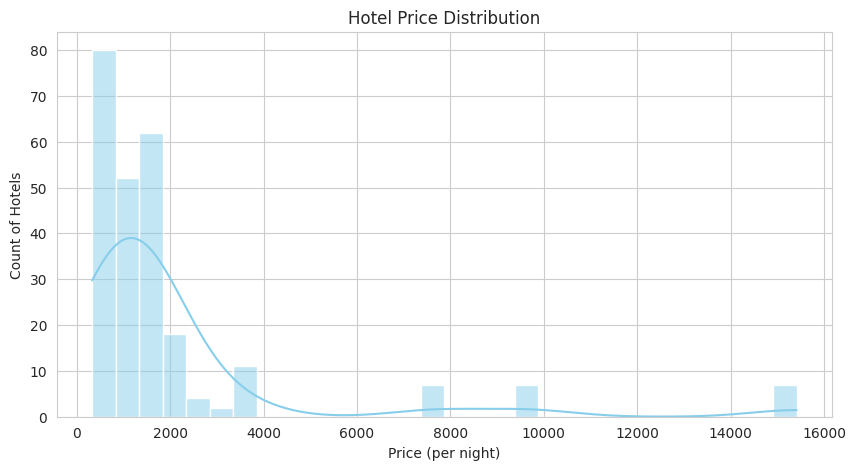

In [8]:
#Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Price"], bins=30, kde=True, color="skyblue")
plt.title("Hotel Price Distribution")
plt.xlabel("Price (per night)")
plt.ylabel("Count of Hotels")
plt.show()


# Observations from Price Distribution
*Most hotels are priced under ₹5000 per night*.

*A few hotels have significantly higher prices, possibly luxury or premium hotels.*

*There's a peak at the lower price range, indicating budget hotels dominate*.



In [ ]:
#Hotel Type vs. Price
plt.figure(figsize=(10, 5))
sns.boxplot(x="Hotel_Type", y="Price", data=df, palette="coolwarm")
plt.title("Hotel Type vs. Price")
plt.xlabel("Hotel Type (Star Rating)")
plt.ylabel("Price (per night)")
plt.show()


# Observations: Hotel Type vs. Price

*Higher-star hotels generally charge more, but there's price overlap among 3-star, 4-star, and even some 5-star hotels.*

*5-star hotels show high price variation, meaning some luxury hotels charge a premium.*

*Budget-friendly hotels (3-star and below) have a more compact price range.*

In [ ]:
#Number of Hotels by Locality
plt.figure(figsize=(12, 6))
sns.countplot(y=df["Locality"], order=df["Locality"].value_counts().index, palette="viridis")
plt.title("Number of Hotels by Locality")
plt.xlabel("Count of Hotels")
plt.ylabel("Locality")
plt.show()


In [ ]:
#Average Price by Locality
plt.figure(figsize=(12, 6))
avg_price_by_locality = df.groupby("Locality")["Price"].mean().sort_values()
sns.barplot(y=avg_price_by_locality.index, x=avg_price_by_locality.values, palette="magma")
plt.title("Average Hotel Price by Locality")
plt.xlabel("Average Price (per night)")
plt.ylabel("Locality")
plt.show()

In [ ]:
#Rating Score vs. Number of Reviews
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Score", y="No of Reviews", data=df, hue="Rating", palette="viridis", alpha=0.7)
plt.title("Hotel Rating Score vs. Number of Reviews")
plt.xlabel("Rating Score")
plt.ylabel("Number of Reviews")
plt.show()


In [3]:
#Featured Hotels Analysis
plt.figure(figsize=(8, 5))
sns.boxplot(x="Featured", y="Price", data=df, hue="Featured", palette="pastel")
plt.title("Price Distribution for Featured vs Non-Featured Hotels")
plt.xlabel("Featured on Booking.com (Yes or No)")
plt.ylabel("Price")
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(x="Featured", y="No of Reviews", data=df,hue='Featured', palette="pastel")
plt.title("Do Featured Hotels Get More Reviews?")
plt.xlabel("Featured on Booking.com (1 = Yes, 0 = No)")
plt.ylabel("Number of Reviews")
plt.show()


NameError: name 'df' is not defined

<Figure size 800x500 with 0 Axes>